In [5]:
import tensorflow as tf
import tensorflow_probability as tfp
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [62]:
IMG_SIZE = 224


def resize(image):
    return tf.image.resize(tf.constant(image), size=(IMG_SIZE, IMG_SIZE)) / 255.0


def imshow(img_list):
    size = len(img_list)
    
    plt.figure()
    for i in range(1, size + 1):
        plt.subplot(1, size, i)
        plt.axis("off")
        plt.imshow(img_list[i-1])

    plt.show()

/job:localhost/replica:0/task:0/device:GPU:0


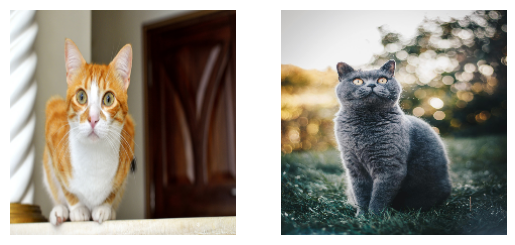

In [54]:
# with tf.device("/gpu:0"):
img_1 = cv.imread(os.path.join("..", "assets", "cat1.jpg"))[:, :, ::-1]
img_2 = cv.imread(os.path.join("..", "assets", "cat2.jpg"))[:, :, ::-1]

img_1 = resize(img_1)
img_2 = resize(img_2)
print(img_1.device)

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_1)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_2)
plt.show()

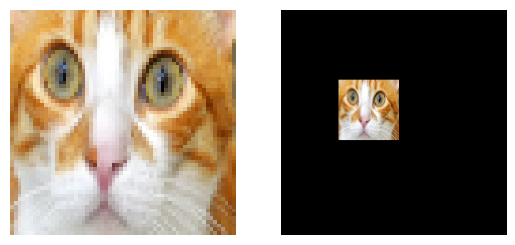

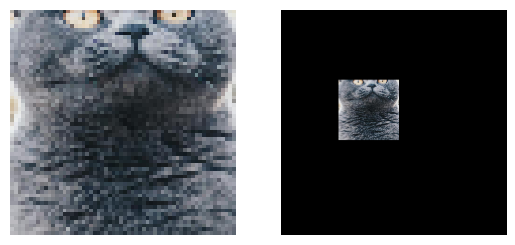

In [63]:
# offset_height -> left corner top position starting from top
# offset_width -> left corner top position starting from left
offset_height = 70
offset_width = 57
target_height=60
target_width=60

bb_1 = tf.image.crop_to_bounding_box(
    img_1, offset_height, offset_width, target_height, target_width
)
pad_1 = tf.image.pad_to_bounding_box(
    bb_1, offset_height, offset_width, IMG_SIZE, IMG_SIZE
)

bb_2 = tf.image.crop_to_bounding_box(
    img_2, offset_height, offset_width, target_height, target_width
)
pad_2 = tf.image.pad_to_bounding_box(
    bb_2, offset_height, offset_width, IMG_SIZE, IMG_SIZE
)

imshow([bb_1, pad_1])
imshow([bb_2, pad_2])

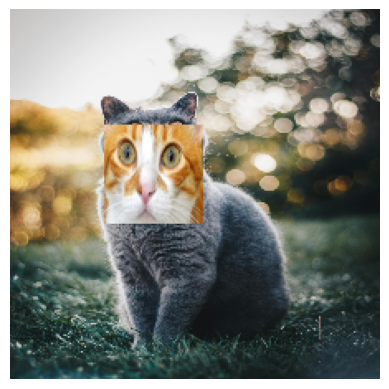

In [64]:
cutmix_img = img_2 - pad_2 + pad_1
imshow([cutmix_img])